<a href="https://colab.research.google.com/github/jayasuryajsk/quarantine-time-pass/blob/master/hand-gesture-recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download gti-upm/leapgestrecog


leapgestrecog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
from fastai.vision import*
from fastai.metrics import error_rate

In [6]:
!mkdir signs
%cd signs

/content/signs


In [0]:
!unzip leapgestrecog.zip

In [0]:
path = Path('/content/signs/leapGestRecog/')

In [0]:
bs = 64 #batch size

In [0]:
tfms = get_transforms(do_flip=True,max_lighting=0.1,max_rotate=0.1)

In [0]:
data = ImageDataBunch.from_folder(path,train='.',valid_pct=0.15,ds_tfms=tfms,size=224,num_workers=4)

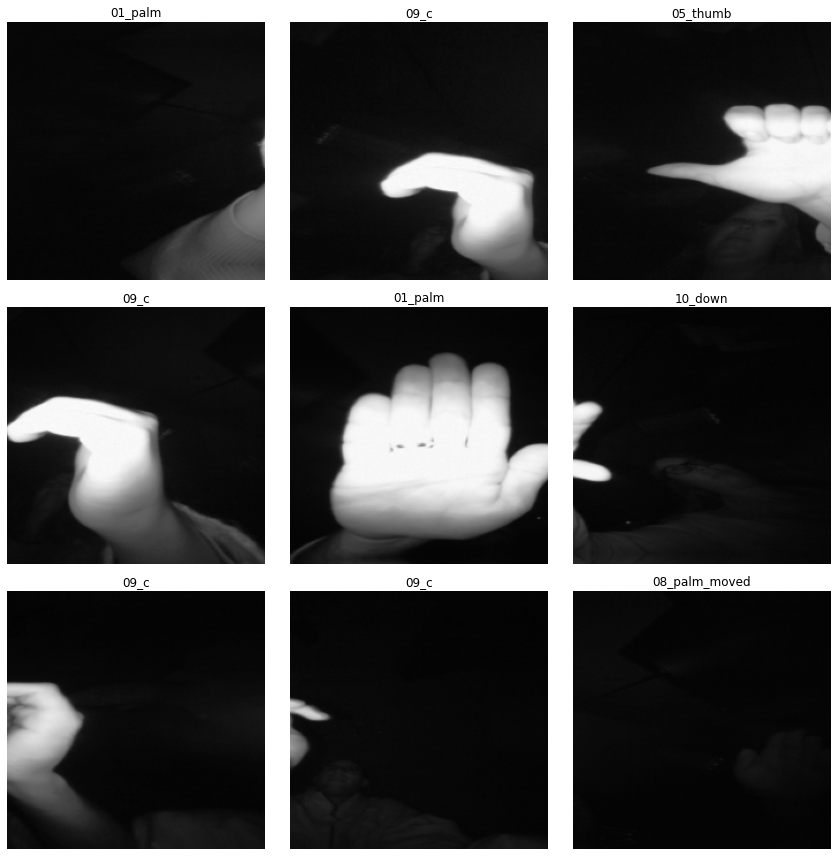

In [12]:
data.show_batch(3)

In [13]:
len(data.classes), len(data.train_ds), len(data.valid_ds)

(10, 17000, 3000)

In [0]:
fb = FBeta()
fb.average = 'macro'

In [14]:
learn = cnn_learner(data,models.resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.107867,0.084919,0.974000,04:38
1,0.715240,0.029587,0.992000,04:29
2,0.557662,0.017087,0.996667,04:24
3,0.526275,0.012514,0.997667,04:21


In [0]:
learn.save('final')

In [18]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


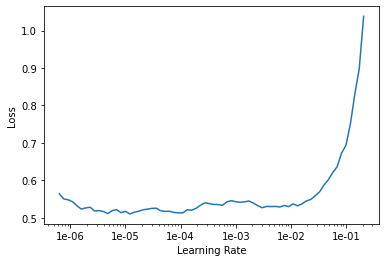

In [19]:
learn.recorder.plot()